In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/feed.csv')

*   The dataset contains iron concentrate at various time stamps. Using these concentration values, we intend to prepare a time series forecasting model which will help us in monitoring the iron concentration during froth flotation process.



In [ ]:
df.head()

,Unnamed: 0,X1,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
0,1,0.0,2017-03-10 01:02:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,66.493242,1.31
1,2,1.0,2017-03-10 01:02:20,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,66.853733,1.31
2,3,2.0,2017-03-10 01:02:40,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,64.773804,1.31
3,4,3.0,2017-03-10 01:03:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,68.550271,1.31
4,5,4.0,2017-03-10 01:03:20,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,65.116564,1.31


In [ ]:
df.shape

(589962, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589962 entries, 0 to 589961
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            589962 non-null  int64  
 1   X1                    589962 non-null  float64
 2   date                  589962 non-null  object 
 3   % Iron Feed           589962 non-null  float64
 4   % Silica Feed         589962 non-null  float64
 5   Starch Flow           589962 non-null  float64
 6   Amina Flow            589962 non-null  float64
 7   Ore Pulp Flow         589962 non-null  float64
 8   Ore Pulp pH           589962 non-null  float64
 9   Ore Pulp Density      589962 non-null  float64
 10  % Iron Concentrate    589962 non-null  float64
 11  % Silica Concentrate  589962 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 54.0+ MB


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.drop('X1', axis = 1, inplace = True)

In [ ]:
df.isna().sum()

date                    0
% Iron Feed             0
% Silica Feed           0
Starch Flow             0
Amina Flow              0
Ore Pulp Flow           0
Ore Pulp pH             0
Ore Pulp Density        0
% Iron Concentrate      0
% Silica Concentrate    0
dtype: int64

In [ ]:
df['date']

0         2017-03-10 01:02:00
1         2017-03-10 01:02:20
2         2017-03-10 01:02:40
3         2017-03-10 01:03:00
4         2017-03-10 01:03:20
                 ...         
589957    2017-08-06 20:34:20
589958    2017-08-06 20:34:40
589959    2017-08-06 20:35:00
589960    2017-08-06 20:35:20
589961    2017-08-06 20:35:40
Name: date, Length: 589962, dtype: object

In [ ]:
df['date'].value_counts()

2017-03-10 01:02:00    1
2017-06-22 12:20:20    1
2017-06-22 08:03:00    1
2017-06-22 08:03:20    1
2017-06-22 08:03:40    1
                      ..
2017-05-07 19:33:40    1
2017-05-07 19:34:00    1
2017-05-07 19:34:20    1
2017-05-07 19:34:40    1
2017-08-06 20:35:40    1
Name: date, Length: 589962, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])
unique_dates = df['date'].dt.date.unique()

*   There are values of iron concentration for 20 seconds interval for each day for 138 days.



In [ ]:
len(unique_dates)

138

In [ ]:
unique_dates[0]

datetime.date(2017, 3, 10)

Making predictions on Fe concentratin


*   as the time stamps now are not monotonic as the iron concentration are constant for about an hour, we resample the data hourly.



In [ ]:
amit = pd.DataFrame()
for i in unique_dates:
  validation = df[df['date'].dt.date == i]
  validation['date'] = pd.to_datetime(validation['date'])

  validation['time_column'] = validation['date'].dt.time

  validation['time_column'] = pd.to_datetime(validation['time_column'], format='%H:%M:%S')

  validation.set_index('time_column', inplace=True)

  validation_resampled = validation.resample('1Min').mean()

  validation.drop('date', axis = 1, inplace = True)

  val = validation
  constant_intervals_val = val[val['% Silica Concentrate'] != val['% Silica Concentrate'].shift()]

  constant_intervals_val['time_column'] = pd.date_range(start='1:00:00', periods=len(constant_intervals_val), freq='1H')

  constant_intervals_val.set_index('time_column', inplace=True)

  amit = pd.concat([amit, constant_intervals_val])

In [ ]:
amit.index

DatetimeIndex(['2023-07-11 01:00:00', '2023-07-11 02:00:00',
               '2023-07-11 03:00:00', '2023-07-11 04:00:00',
               '2023-07-11 05:00:00', '2023-07-11 06:00:00',
               '2023-07-11 07:00:00', '2023-07-11 08:00:00',
               '2023-07-11 09:00:00', '2023-07-11 10:00:00',
               ...
               '2023-07-26 10:00:00', '2023-07-26 11:00:00',
               '2023-07-26 12:00:00', '2023-07-26 13:00:00',
               '2023-07-26 14:00:00', '2023-07-26 15:00:00',
               '2023-07-26 16:00:00', '2023-07-26 17:00:00',
               '2023-07-26 18:00:00', '2023-07-26 19:00:00'],
              dtype='datetime64[ns]', name='time_column', length=45686, freq=None)

In [ ]:
amit.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
time_column,,,,,,,,,
2023-07-11 01:00:00,55.2,16.98,3019.530,557.434,395.713,10.06640,1.74000,66.493242,1.31
2023-07-11 02:00:00,55.2,16.98,3170.410,539.673,399.697,10.15890,1.66910,66.695521,1.11
2023-07-11 03:00:00,55.2,16.98,3365.650,573.517,399.023,10.08600,1.70565,68.421170,1.27
2023-07-11 04:00:00,55.2,16.98,2693.750,592.133,409.204,9.94880,1.72472,66.403059,1.36
2023-07-11 05:00:00,55.2,16.98,2352.216,601.807,398.145,9.84375,1.75928,66.372875,1.34


In [ ]:
time_diffs = amit.index.to_series().diff()

is_equispaced = time_diffs.dt.total_seconds().nunique() == 1

if is_equispaced:
    print("The time series index is equispaced.")
else:
    print("The time series index is not equispaced.")

The time series index is not equispaced.


*   the reason is there is jump from 23:00:00 to 00:01:00 at some points






In [ ]:
amit.shape

(45686, 9)

Making the time index monotonic.

In [ ]:
start_time = '2017-07-01 00:00:00'
length = 45686
time_index = pd.date_range(start=start_time, periods=length, freq='1H')

print(time_index)

DatetimeIndex(['2017-07-01 00:00:00', '2017-07-01 01:00:00',
               '2017-07-01 02:00:00', '2017-07-01 03:00:00',
               '2017-07-01 04:00:00', '2017-07-01 05:00:00',
               '2017-07-01 06:00:00', '2017-07-01 07:00:00',
               '2017-07-01 08:00:00', '2017-07-01 09:00:00',
               ...
               '2022-09-16 04:00:00', '2022-09-16 05:00:00',
               '2022-09-16 06:00:00', '2022-09-16 07:00:00',
               '2022-09-16 08:00:00', '2022-09-16 09:00:00',
               '2022-09-16 10:00:00', '2022-09-16 11:00:00',
               '2022-09-16 12:00:00', '2022-09-16 13:00:00'],
              dtype='datetime64[ns]', length=45686, freq='H')


In [ ]:
amit.set_index(time_index, inplace=True)

In [ ]:
amit.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate
2017-07-01 00:00:00,55.2,16.98,3019.530,557.434,395.713,10.06640,1.74000,66.493242,1.31
2017-07-01 01:00:00,55.2,16.98,3170.410,539.673,399.697,10.15890,1.66910,66.695521,1.11
2017-07-01 02:00:00,55.2,16.98,3365.650,573.517,399.023,10.08600,1.70565,68.421170,1.27
2017-07-01 03:00:00,55.2,16.98,2693.750,592.133,409.204,9.94880,1.72472,66.403059,1.36
2017-07-01 04:00:00,55.2,16.98,2352.216,601.807,398.145,9.84375,1.75928,66.372875,1.34


Visualising the Fe concentration

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

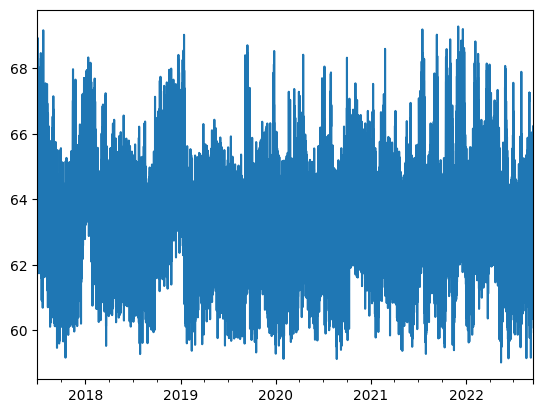

In [ ]:
amit['% Iron Concentrate'].plot()

*  it is difficult to comment about stationality of the data through visiual inspection.
Therefore, performing ADFuller test



Checking for stationality

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(amit['% Iron Concentrate']
                , autolag = 'AIC')

print('P-value is ', dftest[1])

P-value is  4.6431036145561357e-17


* p value is less than 0.05, therefore the time series is stationary


In [ ]:
# d = 0

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

Performing AR

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


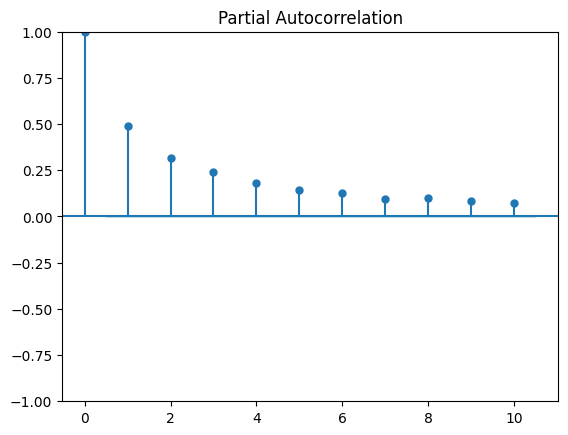

In [ ]:
pacf = plot_pacf(amit['% Iron Concentrate'], lags = 10)

*  PACF (partial auto correlation factor) measures the correlation of a time lag with the current time value of the variable.
Therefore, p is equal to 1.



In [ ]:
amit.isna().sum()

% Iron Feed             0
% Silica Feed           0
Starch Flow             0
Amina Flow              0
Ore Pulp Flow           0
Ore Pulp pH             0
Ore Pulp Density        0
% Iron Concentrate      0
% Silica Concentrate    0
dtype: int64

In [ ]:
amit.shape

(45686, 9)

Preparation for Model Training

In [ ]:
train_size = int(len(amit) * 0.8)
train_data = amit.iloc[:train_size]
test_data = amit.iloc[train_size:]

In [ ]:
xtrain = train_data.drop(['% Iron Concentrate'], axis = 1)
y_fe_train = train_data['% Iron Concentrate']

In [ ]:
xtest = test_data.drop(['% Iron Concentrate'], axis = 1)
y_fe_test = test_data['% Iron Concentrate']

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(xtrain)
xtrain_norm = scale.transform(xtrain)
xtest_norm = scale.transform(xtest)

In [ ]:
print(xtrain_norm.std())
print(xtest_norm.std())

1.0
1.341393414867972


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

Auto Regressive Model

In [ ]:
model_ar = ARIMA(y_fe_train, order=(3, 0, 0), exog=xtrain_norm)
model_fit_ar = model_ar.fit(method_kwargs={'maxiter': 50})

In [ ]:
model_fit_ar.mle_retvals

{'fopt': 1.5148969962363337,
 'gopt': array([ 2.29127828e-07, -3.12372350e-07,  2.61946020e-07,  1.39501743e-06,
         7.07045533e-06, -1.81024085e-06,  6.21027674e-06,  4.43658443e-06,
        -7.91184895e-06,  5.00754993e-07,  3.95417032e-07, -1.26323396e-06,
         1.30897515e-06]),
 'fcalls': 350,
 'warnflag': 0,
 'converged': True,
 'iterations': 21}

In [ ]:
predictions_ar = model_fit_ar.predict(start=len(y_fe_train), end=len(y_fe_train) + len(y_fe_test) - 1, exog=xtest_norm)

In [ ]:
predictions_ar

2021-08-31 20:00:00    62.954995
2021-08-31 21:00:00    64.168217
2021-08-31 22:00:00    64.384042
2021-08-31 23:00:00    64.299196
2021-09-01 00:00:00    64.309756
                         ...    
2022-09-16 09:00:00    63.835071
2022-09-16 10:00:00    63.958396
2022-09-16 11:00:00    63.783755
2022-09-16 12:00:00    64.216719
2022-09-16 13:00:00    63.981778
Freq: H, Name: predicted_mean, Length: 9138, dtype: float64

In [ ]:
mean_squared_error(y_fe_test, predictions_ar, squared=False)

1.265753411273158

In [ ]:
y_fe_test

2021-08-31 20:00:00    63.736818
2021-08-31 21:00:00    63.395545
2021-08-31 22:00:00    63.253064
2021-08-31 23:00:00    64.701262
2021-09-01 00:00:00    64.744680
                         ...    
2022-09-16 09:00:00    63.815565
2022-09-16 10:00:00    64.379714
2022-09-16 11:00:00    64.356319
2022-09-16 12:00:00    65.298416
2022-09-16 13:00:00    63.722241
Freq: H, Name: % Iron Concentrate, Length: 9138, dtype: float64

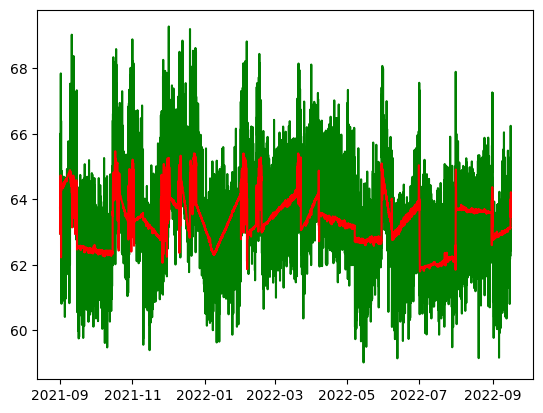

In [ ]:
plt.plot(y_fe_test, color = 'green')
plt.plot(predictions_ar, color = 'red')

Moving Average Model

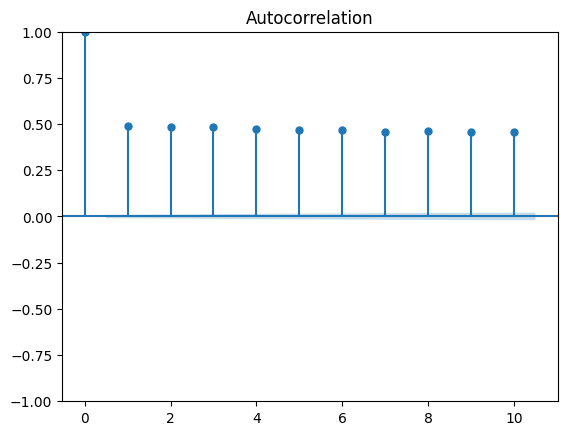

In [ ]:
acf = plot_acf(amit['% Iron Concentrate'], lags = 10)

*   it seems that a lot of previous lags contribute directly or indirectly to the current time variable.
Taking only 10 lags





In [ ]:
model_ma = ARIMA(y_fe_train, order=(0, 0, 2), exog=xtrain_norm)
model_fit_ma = model_ma.fit(method_kwargs={'maxiter': 50})

In [ ]:
model_fit_ma.mle_retvals

{'fopt': 1.5776189023860439,
 'gopt': array([ 1.13242748e-09, -3.61932706e-07,  8.52207194e-08, -2.69460010e-06,
        -8.75655104e-07, -6.05360206e-07, -5.98721073e-07, -7.92543808e-07,
         4.10182999e-07,  6.74504896e-07, -2.92210700e-08, -2.30844233e-06]),
 'fcalls': 247,
 'warnflag': 0,
 'converged': True,
 'iterations': 17}

In [ ]:
predictions_ma = model_fit_ma.predict(start=len(y_fe_train), end=len(y_fe_train) + len(y_fe_test) - 1, exog=xtest_norm)

In [ ]:
predictions_ma

2021-08-31 20:00:00    62.962703
2021-08-31 21:00:00    64.380587
2021-08-31 22:00:00    64.395693
2021-08-31 23:00:00    64.306168
2021-09-01 00:00:00    64.340326
                         ...    
2022-09-16 09:00:00    63.728763
2022-09-16 10:00:00    63.831401
2022-09-16 11:00:00    63.662961
2022-09-16 12:00:00    64.115612
2022-09-16 13:00:00    63.842074
Freq: H, Name: predicted_mean, Length: 9138, dtype: float64

In [ ]:
mean_squared_error(y_fe_test, predictions_ma, squared=False)

1.2677807976263291

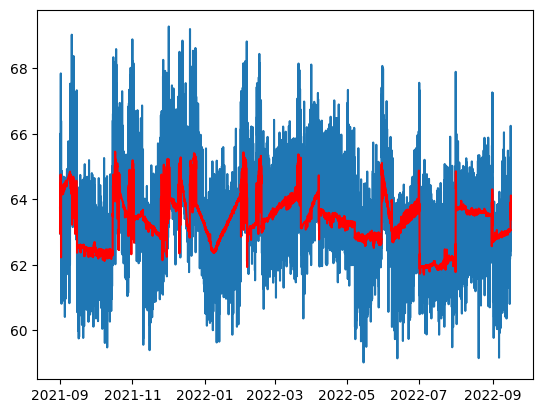

In [ ]:
plt.plot(y_fe_test)
plt.plot(predictions_ma, color = 'red')

ARIMA Model

In [ ]:
model_arima = ARIMA(y_fe_train, order=(3, 0, 2), exog=xtrain_norm)
model_fit_arima = model_arima.fit(method_kwargs={'maxiter': 100})

In [ ]:
model_fit_arima.mle_retvals

{'fopt': 1.4485322587431035,
 'gopt': array([ 1.97364347e-06,  1.69688708e-06, -9.64761604e-06,  1.82047710e-06,
        -4.40774084e-06, -9.87818716e-06, -5.72808467e-06,  1.03779207e-05,
         2.61479727e-06, -4.99356112e-07, -4.84059459e-06, -5.01510167e-05,
        -9.87536719e-06,  1.10165210e-06, -2.86856983e-05]),
 'fcalls': 1120,
 'warnflag': 0,
 'converged': True,
 'iterations': 62}

In [ ]:
predictions_arima = model_fit_arima.predict(start=len(y_fe_train), end=len(y_fe_train) + len(y_fe_test) - 1, exog=xtest_norm)

In [ ]:
predictions_arima

2021-08-31 20:00:00    64.388773
2021-08-31 21:00:00    66.233361
2021-08-31 22:00:00    66.256432
2021-08-31 23:00:00    66.264991
2021-09-01 00:00:00    66.126031
                         ...    
2022-09-16 09:00:00    64.256583
2022-09-16 10:00:00    64.541222
2022-09-16 11:00:00    64.326719
2022-09-16 12:00:00    64.898857
2022-09-16 13:00:00    64.616945
Freq: H, Name: predicted_mean, Length: 9138, dtype: float64

In [ ]:
mean_squared_error(y_fe_test, predictions_arima, squared=False)

1.279353778618915

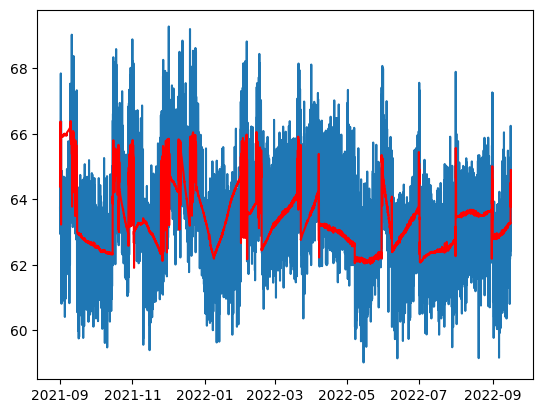

In [ ]:
plt.plot(y_fe_test)
plt.plot(predictions_arima, color = 'red')

In [ ]:
amit['% Iron Concentrate'].min()

59.0146561465307

In [ ]:
amit['% Iron Concentrate'].max()

69.2781413605185

*   The average value of iron concentration is 64.
*   The minimum value of iron concentration is 59.
*   The maximum value of iron concentration is 69.



The root mean squared errors are as follows:-

*   AR model : 1.265
*   MA model : 1.267
*   ARIMA model : 1.27


A rmse of 1.2 is asceptable when the values are in 60s.
We select AR model as the best performing model, though the performances are comparable.